# RAISR : Rapid and Accurate Image Super Resolution

The relationship between a low resolution image (LR) and high resolution image (HR) can be thought of as LR = d*H*HR where d is the decimation factor and H is the filter of H ∈ MN^2×MN^2 where MXN is the size of LR. 

Various attempts have been made at trying to learn this relationship between the two spaces. But by far, this paper has the best performance for the corresponding training over head. And also the solution is a lot more intuitive. 

The solution is to solve min(Ah-b) on h where A is composed of d-lenght patches from training images (LR) and b is pixels in the corresponding ground truth/high resolution image. The obvious way to do this is to learn that on the whole image at once but that doesn't really capture the objects at a patch level and doesn't translate well to new test images, So instead the paper learns a "good" filter per patch. The patch is a dxd square centered at the pixel in question. 

# Changing the optimization problem a little to reduce memory and allow for parallel computation

Instead of learning min(Ah-b), this can be transformed into min(transpose(A)xAxh - transpose(A)xb) . transpose(A)xA would only require
d2xd2 in space and transpose(A)xA can be calculated parallely. 

But, if we try to learn a filter per patch then say we have a 400x400 image - we have to find 1600 optimal filters. This only grows as the image size increase
        Instead we learn four properties on each image patch (angle, gradient, coherence and pixeltype) and quantize the patch type into a 
one of the buckets of 24 (Qangle)  , 3(Qstrenght) , 3(coherence), 4(pixeltype - refer bilinear interpolation documentation on where this 4 comes from) available buckets

# Free training samples 

For every patch it's possible to obtain more learning for free by rotating the patch by 90 and four mirrored 90 rotations.Since each transformation is a rotation and
mirroring, the transformed patches often belong to a different hash bucket and shift. For example, a patch that is
rotated by 90
changes the hash angle bucket by 90. We don;t have to learn these during the actual patch calculations instead we can learn these before solving the optimization problem by manipulating the Q,V functions. See code in train notebooks.

Once we have the total Q and V functions (Q=ATA and V=ATb) - we learn the filters h by solving the optimization problem using cgls method And this is stored as jld files in the folder

After training is done, you can use the filters you learnt on new patches/images by calculating the strength, coherence, angle and pixeltype for the patches
    and looking up the appropriate filter to multiply the patch by. 

# Performance on very pixelated images! Including one here with anti-aliasing effects 

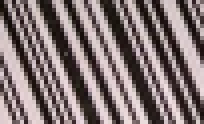

In [4]:
using Images
test_image = load("/Users/manvithaponnapati/RAISR/test_data/barcode.png")

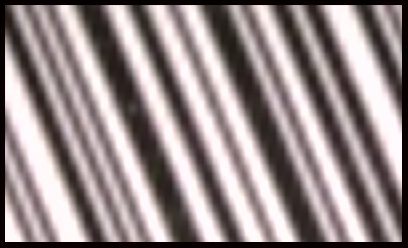

In [5]:
learnt_image = load("/Users/manvithaponnapati/RAISR/test_data/learntbarcode.png")

The filters are learnt on a smaller are included in this folder for anyone interested to paly around. There arte some other things that can be done to improve the perfomance of this algorithm. NEw developments will be made to https://github.com/ManvithaPonnapati/RAISR.jl/